In [1]:
import pandas as pd
import numpy as np
starbucks = pd.read_csv("starbucks_cleaned.csv")

In [2]:
starbucks.head()

,Unnamed: 0,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),...,Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Size,Prepped Beverages
0,0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,...,0,0,0.3,0.0,0.0,0.00,0.0,175,Short,Brewed Coffee
1,1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,...,0,0,0.5,0.0,0.0,0.00,0.0,260,Tall,Brewed Coffee
2,2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,...,0,0,1.0,0.0,0.0,0.00,0.0,330,Grande,Brewed Coffee
3,3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,...,0,0,1.0,0.0,0.0,0.02,0.0,410,Venti,Brewed Coffee
4,4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,...,0,9,6.0,0.1,0.0,0.20,0.0,75,Short,"Caffè Latte, Nonfat Milk"


In [3]:
starbucks.drop(["Unnamed: 0", "Prepped Beverages"], axis=1, inplace=True)

In [4]:
##replace categorical columns with numbers
def enumerate_(column_name):
    string_name = "Enumerated_" + column_name
    starbucks[string_name] = starbucks[column_name].replace(
        starbucks[column_name].unique().tolist(), 
        np.arange(0, len(starbucks[column_name].unique()), 1).tolist()
    )

In [5]:
for i in ["Beverage_category", "Beverage", "Size", "Beverage_prep"]:
    enumerate_(i)
    starbucks.drop(i, axis=1, inplace=True)
starbucks.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Enumerated_Beverage_category,Enumerated_Beverage,Enumerated_Size,Enumerated_Beverage_prep
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.00,0.0,175,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.00,0.0,260,0,0,1,1
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.00,0.0,330,0,0,2,2
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.02,0.0,410,0,0,3,3
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.1,0.0,0.20,0.0,75,1,1,0,4


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
X = starbucks.loc[:, :"Iron (% DV) "]
X = X.join(starbucks.loc[:, "Enumerated_Beverage_category":])

In [8]:
print(X)

     Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
0           3             0.1             0.0                0.0   
1           4             0.1             0.0                0.0   
2           5             0.1             0.0                0.0   
3           5             0.1             0.0                0.0   
4          70             0.1             0.1                0.0   
..        ...             ...             ...                ...   
214       320             3.2             0.4                0.0   
215       170             0.1             0.1                0.0   
216       200             3.5             2.0                0.1   
217       180             1.5             0.2                0.0   
218       240             0.1             0.1                0.0   

      Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
0               0                          5                 0   
1               0                         10       

In [9]:
y = starbucks.loc[:, "Caffeine (mg)"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
import warnings
warnings.filterwarnings('ignore')
parameters = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"], #default sq
    "min_samples_leaf"  : [1, 2, 3, 4], #default 1
    "max_features" : ["auto", "sqrt", "log2", None] #default None
}
clf = GridSearchCV(RandomForestRegressor(),                    
                   param_grid = parameters,          
                   cv=5)   

clf.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'criterion': 'friedman_mse', 'max_features': 'auto', 'min_samples_leaf': 1}


In [12]:
best_regressor = clf.best_estimator_
test_score = best_regressor.score(X_test, y_test)
print("Test R-squared score:", test_score)

Test R-squared score: 0.8413780175619779


In [13]:
criterion = clf.best_params_["criterion"]
max_features = clf.best_params_["max_features"]
min_samples_leaf = clf.best_params_["min_samples_leaf"]
rf = RandomForestRegressor(criterion = criterion, max_features=max_features, min_samples_leaf=min_samples_leaf)

In [14]:
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='auto')

In [15]:
predict = rf.predict(X_test)

In [16]:
np.sqrt(metrics.mean_squared_error(y_test, predict))

23.83941382490667

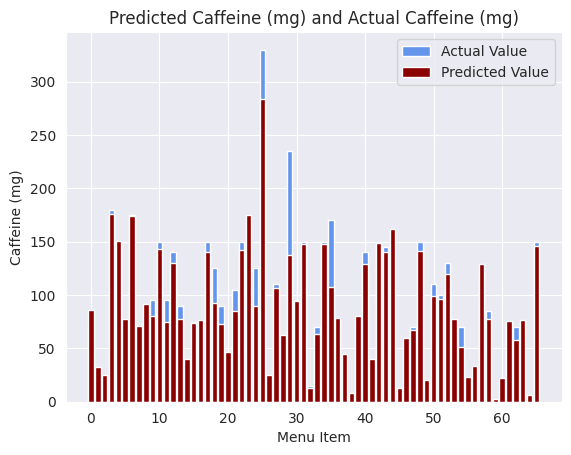

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
x = np.arange(0, len(predict), 1)
plt.bar(x = x.tolist(), height = y_test, color="cornflowerblue")
plt.bar(x = x.tolist(), height = predict, color="darkred")
keys = ["Actual Value", "Predicted Value"]
plt.title("Predicted Caffeine (mg) and Actual Caffeine (mg)")
plt.ylabel("Caffeine (mg)")
plt.xlabel("Menu Item")
plt.legend(labels = keys)
plt.show()

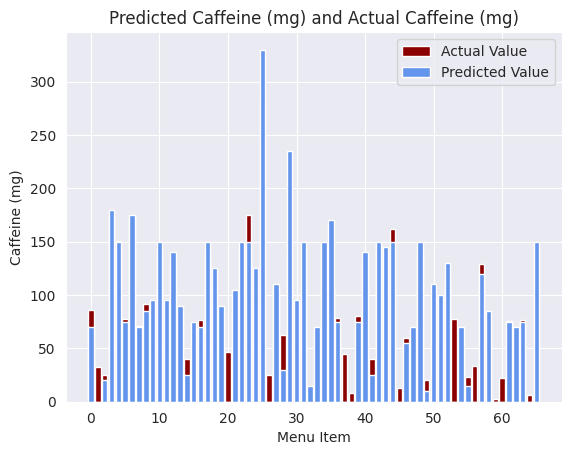

In [18]:
x = np.arange(0, len(predict), 1)
plt.bar(x = x.tolist(), height = predict, color="darkred")
plt.bar(x = x.tolist(), height = y_test, color="cornflowerblue")
keys = ["Actual Value", "Predicted Value"]
plt.title("Predicted Caffeine (mg) and Actual Caffeine (mg)")
plt.ylabel("Caffeine (mg)")
plt.xlabel("Menu Item")
plt.legend(labels = keys)
plt.show()

In [28]:
same = []
xs = []
for i in range(len(y_test)):
    if np.array(y_test)[i] == predict[i]:
        same.append(predict[i])
        xs.append(i)

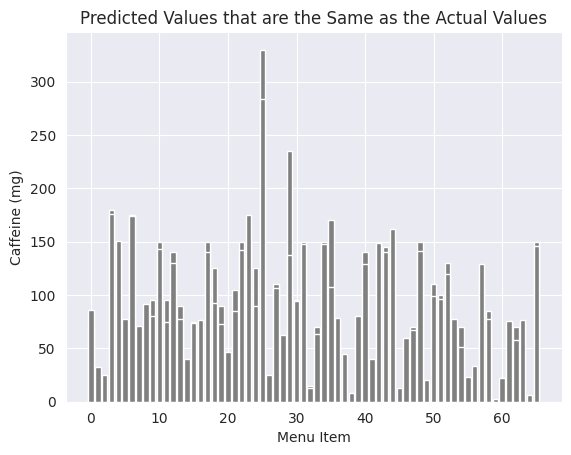

In [23]:
plt.bar(x = x.tolist(), height = y_test, color = "grey")
plt.bar(x = x.tolist(), height = predict, color="grey")
plt.bar(x = xs, height = same, color = "g")
keys = ["Different Value", "Matching Value"]
plt.title("Predicted Values that are the Same as the Actual Values")
plt.ylabel("Caffeine (mg)")
plt.xlabel("Menu Item")
plt.show()

In [24]:
rf.feature_importances_

array([0.04851145, 0.00750867, 0.01196421, 0.00082132, 0.00252583,
       0.12004837, 0.05194107, 0.00846839, 0.06273797, 0.0269989 ,
       0.0094754 , 0.01885736, 0.02545393, 0.01576774, 0.08213392,
       0.268105  , 0.17227441, 0.06640605])

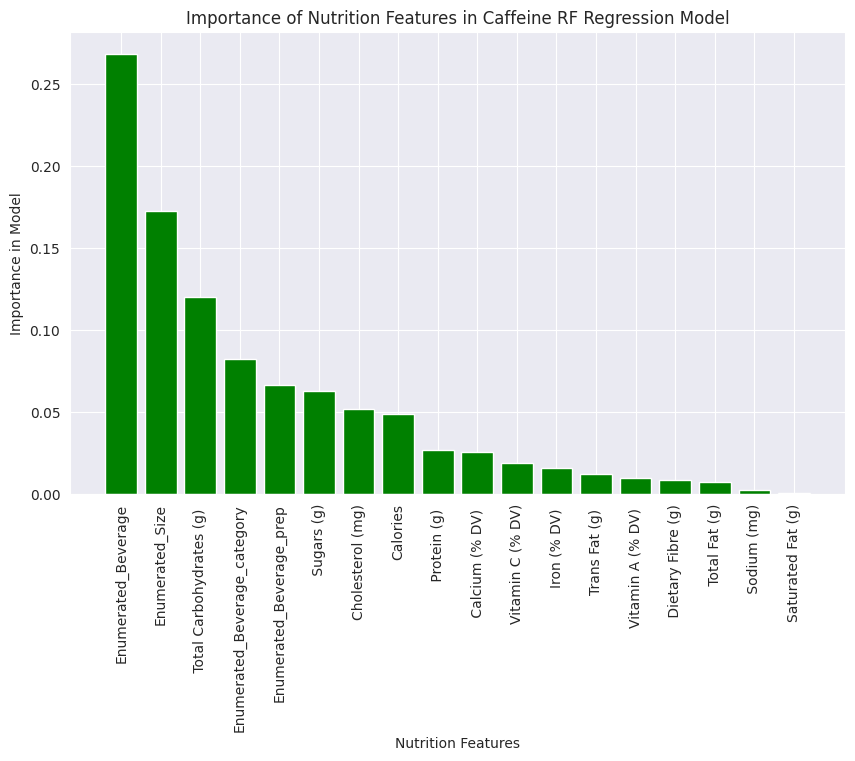

In [29]:
import seaborn as sns
sns.set_style("darkgrid")
importances = rf.feature_importances_
# [::-1] puts the sorted list in reverse order
# importances is the measured importance, features is the features
left_sorted_importances = importances[importances.argsort()[::-1]]
left_sorted_features = X_train.columns[importances.argsort()[::-1]]

plt.figure(figsize=(10, 6))
plt.bar(left_sorted_features, left_sorted_importances, color="green")
plt.xticks(rotation=90)
plt.xlabel('Nutrition Features')
plt.ylabel('Importance in Model')
plt.title('Importance of Nutrition Features in Caffeine RF Regression Model')
plt.show()